## Weekly Activity
1. Apply k-means clustering on 'zebra.jfif' to segment out the zebra.
  - You are required to determine the optimal k by plotting the within cluster sum of squares vs number of clusters (2-10).
  - Apply the clustering method on 3 color spaces: BGR, HSV and LAB. Compare the results obtained.

In [1]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
from util_func import *

In [2]:
# apply k-means clustering on image
def k_means_clust(img, K, max_iter=10, eps=1.0, attempts=10, flag=cv.KMEANS_PP_CENTERS):
    """Args:
    img: 3-channel color image
    K: user defined number of kluster
    By default, max_iter=10, eps=1, attempts=10, k-means++"""
    #reshape and cast
    img = img.reshape((-1, 3))
    img = np.float32(img)
    criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_MAX_ITER, max_iter, eps)
    
    return cv.kmeans(img, K, None, criteria, attempts, flag)

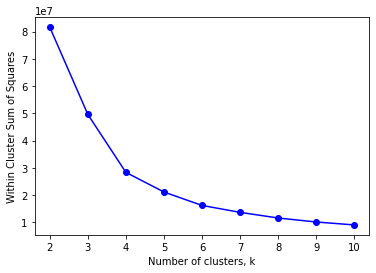

In [63]:
img = cv.imread("images/zebra.jfif")

sse = []
for k in range(2, 11):
    ret, label, center = k_means_clust(img, k)
    sse.append(ret)
    
plt.plot(range(2,11), sse, "bo-")
plt.xlabel("Number of clusters, k")
plt.ylabel("Within Cluster Sum of Squares")
plt.show()

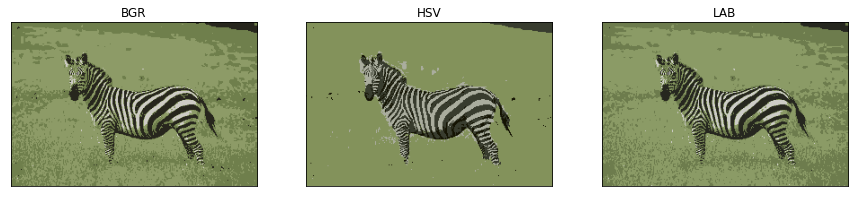

In [120]:
# chosen as optimal k
k = 4

plt.figure(figsize=(15, 15))

# BGR k-means
img_bgr = img.copy()
ret, label, center = k_means_clust(img_bgr, k)
center = np.uint8(center)
res = center[label.ravel()]
quant_bgr = res.reshape(img_bgr.shape)
quant_bgr = cv.cvtColor(quant_bgr, cv.COLOR_BGR2RGB)

plt.subplot(131), plt.title("BGR")
plt_img(quant_bgr)

# HSV k-means
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
ret, label, center = k_means_clust(img_hsv, k)
center = np.uint8(center)
res = center[label.ravel()]
quant_hsv = res.reshape(img_hsv.shape)
quant_hsv = cv.cvtColor(quant_hsv, cv.COLOR_HSV2RGB)

plt.subplot(132), plt.title("HSV")
plt_img(quant_hsv)

# LAB k-means
img_lab = cv.cvtColor(img, cv.COLOR_BGR2Lab)
ret, label, center = k_means_clust(img_lab, k)
center = np.uint8(center)
res = center[label.ravel()]
quant_lab = res.reshape(img_lab.shape)
quant_lab = cv.cvtColor(quant_lab, cv.COLOR_Lab2RGB)

plt.subplot(133), plt.title("LAB")
plt_img(quant_lab)

# BGR: Grasses appear as noises with the zebra. Unable to segment zebra properly.
# HSV: Able to segment zebra with the little noises in the background.
# LAB: Almost the same with BGR. Has slightly lesser noise around the zebra